In [42]:
import glob
import pandas as pd
import vaderSentiment
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

# Have I got news for you: Reuters headline analysis

This kernel explores the great date set provided on [Kaggle](https://www.kaggle.com/therohk/reuters-news-wire-archive) by Rohk. The data set is simply a collection Reuter's headlines and a timestamp of their publication. I intend to work through it as follows:

## Contents

1. [Load input files](#input)
2. [Word clouds](#clouds)

## Load input files <a name="input"></a>

Input data is provided as a handful of .csvs, so use the glob package to find them all and read sequentially.

In [43]:
input_files = glob.glob('../input/*.csv')
input_dfs = []
for file in input_files:
    df = pd.read_csv(file, nrows=1000)
    input_dfs.append(df)
df = pd.concat(input_dfs)

OK loaded, so how much data do we have?

In [44]:
print('{} headlines from {} to {}'.format(len(df), min(df['publish_time']), max(df['publish_time'])))
df.head()

4148808 headlines from 201201010005 to 201712312352


,publish_time,headline_text
0,201201010005,Leap Year 2012 Calls for 'One More Disney Day'...
1,201201010014,MSG Leaves Time Warner Cable Sports Fans in th...
2,201201010040,Box Office - 'M - I - 4' Passes $100M Domestic...
3,201201010048,New York New Year
4,201201010053,Number of Ion Community Users Triples; Spurred...


The dataset contains >4m headlines over 6 years, plenty to look through! Lets convert the *publish_time* feature to a pandas datetime to make it more usable. 

**Note** this may take a while due to the number of rows and datetime conversions can be slow.

In [45]:
df['publish_time'] = pd.to_datetime(df['publish_time'].astype(str), format='%Y%m%d%H%M')

And we may as well have a look at the distribution of headlines over time to start with:

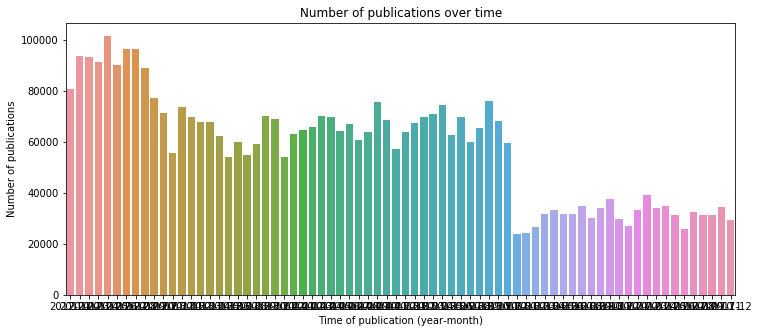

In [46]:
fig, ax = plt.subplots(figsize=[12, 5])
counts_by_year_month = df.groupby(df['publish_time'].dt.to_period('M'))['publish_time'].count()
sns.barplot(x=counts_by_year_month.index, 
            y=counts_by_year_month,
            ax=ax)
ax.set_xlabel('Time of publication (year-month)')
ax.set_ylabel('Number of publications')
ax.set_title('Number of publications over time')
plt.show()

## Word clouds <a name="clouds"></a>

A favourite of any text analysis, lets plot some worldclouds to visualise the most popular words in the headlines. To make it a bit more interesting, I'll compare wordclouds from 2013 and 2017 to see if anything has changed.

In [ ]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize=[15, 7])

# Plot for 2013
wc = WordCloud(width=500, height=400)
wc.generate(' '.join(df.loc[df['publish_time'] < pd.Timestamp('2014-01-01'), 'headline_text'].astype(str)))
ax.imshow(wc, interpolation='bilinear')
ax.axis('off')
ax.set_title('2013 Headlines')

# Plot for 2017
wc1 = WordCloud(width=500, height=400)
wc1.generate(' '.join(df.loc[df['publish_time'] < pd.Timestamp('2014-01-01'), 'headline_text'].astype(str)))
ax1.imshow(wc1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('2017 Headlines')

plt.show()

## Sentiment analysis